# gpt-41 in AzureAI Foundry

<img src="https://azure.microsoft.com/en-us/blog/wp-content/uploads/2025/04/90e545fa-57c0-45bc-bcdd-b865918b886f-1024x576.webp">

> https://azure.microsoft.com/en-us/blog/announcing-the-gpt-4-1-model-series-for-azure-ai-foundry-developers/?msockid=2e39c66c693c66a5151fd200687567d0

In [1]:
import base64
import os
import sys

from datetime import datetime
from dotenv import load_dotenv
from openai import AzureOpenAI
from PIL import Image

In [2]:
sys.version

'3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]'

In [3]:
print(f"Today is {datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 18-Apr-2025 07:43:36


In [4]:
print('OK') if load_dotenv("azure.env") else print('ERROR: Check file location or name.')

OK


In [5]:
model_name = "gpt-4.1"
deployment = "gpt-4.1"

api_version = "2024-12-01-preview"

In [6]:
client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=os.getenv("endpoint"),
    api_key=os.getenv("key"),
)

In [7]:
response = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant.",
        },
        {
            "role": "user",
            "content": "I am going to Paris, what should I see?",
        }
    ],
    max_completion_tokens=800,
    temperature=1.0,
    top_p=1.0,
    frequency_penalty=0.0,
    presence_penalty=0.0,
    model=deployment
)

print(response.choices[0].message.content)

That’s exciting! Paris is full of incredible sights. Here are some must-see spots and experiences to consider:

### Iconic Landmarks
- **Eiffel Tower:** Go to the top for amazing views. The park below (Champ de Mars) is great for photos or a picnic.
- **Louvre Museum:** Home to the Mona Lisa, Venus de Milo, and countless treasures. It’s huge, so plan ahead for what you want to see.
- **Notre-Dame Cathedral:** Even after the fire, the area is still worth visiting—the exterior, Île de la Cité, and nearby Sainte-Chapelle (stunning stained glass!).
- **Arc de Triomphe & Champs-Élysées:** Climb to the top for panoramic views and stroll the famous avenue.

### Art & Culture
- **Musée d'Orsay:** Impressionist masterpieces in a stunning former train station.
- **Montmartre & Sacré-Cœur:** A hilltop basilica with sweeping city views, plus the artistic village vibe of Montmartre.

### Parks & Gardens
- **Luxembourg Gardens:** Lush, classic French gardens—great for a relaxing stroll.
- **Tuilerie

## Analysing an image file

In [8]:
prompt = "What is the total amount? What are the date and the order id?"

image_url = "https://templates.invoicehome.com/modele-facture-fr-pur-750px.png"

In [9]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
            "role": "system",
            "content": "You are an AI helpful assistant."
        },
        {
            "role":
            "user",
            "content": [{
                "type": "text",
                "text": prompt,
            }, {
                "type": "image_url",
                "image_url": {
                    "url": image_url,
                },
            }]
        },
    ],
)

print(response.choices[0].message.content)

Here is the information from the invoice:

- Total amount: 174.00 €
- Date: 29/01/2019
- Order ID (Commande N°): 1630/2019


In [10]:
prompt = "You can see two images here. One on the left and one on the right. What are the differences between them?"
image_url = "https://img.jagranjosh.com/images/2023/February/1822023/Spot-5-Differences-in-13-Seconds.jpg"

In [11]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
            "role": "system",
            "content": "You are an AI helpful assistant."
        },
        {
            "role":
            "user",
            "content": [{
                "type": "text",
                "text": prompt,
            }, {
                "type": "image_url",
                "image_url": {
                    "url": image_url,
                },
            }]
        },
    ],
)

print(response.choices[0].message.content)

Here are the differences between the two images, excluding the blurred face:

1. Buildings: There are buildings in the background of the right image that are missing from the left image.
2. Girl in center: In the right image, the girl in the center has pigtails, but in the left image, she does not.
3. Frisbee/disk: The frisbee/disk thrown by the boy is red in the right image and green in the left image.
4. Bird’s nest: There are eggs in the bird’s nest in the left image, but no eggs in the nest in the right image.
5. Duck/fish: There is a yellow duck in the pond in the left image, but in the right image, there is an orange fish instead.


In [12]:
prompt = "Describe this image"
image_url = "https://th.bing.com/th/id/OIP.ej866IJVOtDRhQD65TdhYQHaDi?rs=1&pid=ImgDetMain"

In [13]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
            "role": "system",
            "content": "You are an AI helpful assistant."
        },
        {
            "role":
            "user",
            "content": [{
                "type": "text",
                "text": prompt,
            }, {
                "type": "image_url",
                "image_url": {
                    "url": image_url,
                },
            }],
        },
    ],
)

print(response.choices[0].message.content)

This is Charles Joseph Minard’s famous flow map, often referred to as “Minard’s Map.” It is a pioneering example of data visualization, and is widely regarded as one of the best statistical graphics ever drawn.

**What is depicted:**  
The map shows the terrible losses suffered by Napoleon's army during the 1812 Russian campaign, specifically illustrating the size of the army as it marched to Moscow and then retreated.

**Main Features:**
- **Thick Beige Line:** Indicates the size of Napoleon’s army (number of soldiers), thinning as the army progresses toward Moscow (from left to right, west to east), showing decreasing numbers as soldiers die or desert.
- **Black Line:** Represents the return journey from Moscow, heading west. The line continues to thin, vividly illustrating the catastrophic losses suffered during the retreat.
- **Cities and Rivers:** Key locations along the route (e.g., Warsaw, Moscow, Smolensk, etc.) are marked for reference.
- **Temperature Graph:** At the bottom, 

## Using a local image

In [14]:
def gpt41_imagefile(prompt, image_file):
    """
    Analyzing a local image file with gpt4.1
    """
    client = AzureOpenAI(
        api_version=api_version,
        azure_endpoint=os.getenv("endpoint"),
        api_key=os.getenv("key"),
    )
    
    # Transforming local image to base64
    with open(image_file, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode('utf-8')

    # link to base64
    image_uri = f"data:image/jpeg;base64,{base64_image}"

    # Results
    response = client.chat.completions.create(
        model=deployment,
        messages=[
            {
                "role": "system",
                "content": "You are an AI helpful assistant that is analyzing images."
            },
            {
                "role":
                "user",
                "content": [{
                    "type": "text",
                    "text": prompt,
                }, {
                    "type": "image_url",
                    "image_url": {
                        "url": image_uri,
                    },
                }]
            },
        ],
        max_tokens=800,
        temperature=0.,
    )

    return response.choices[0].message.content

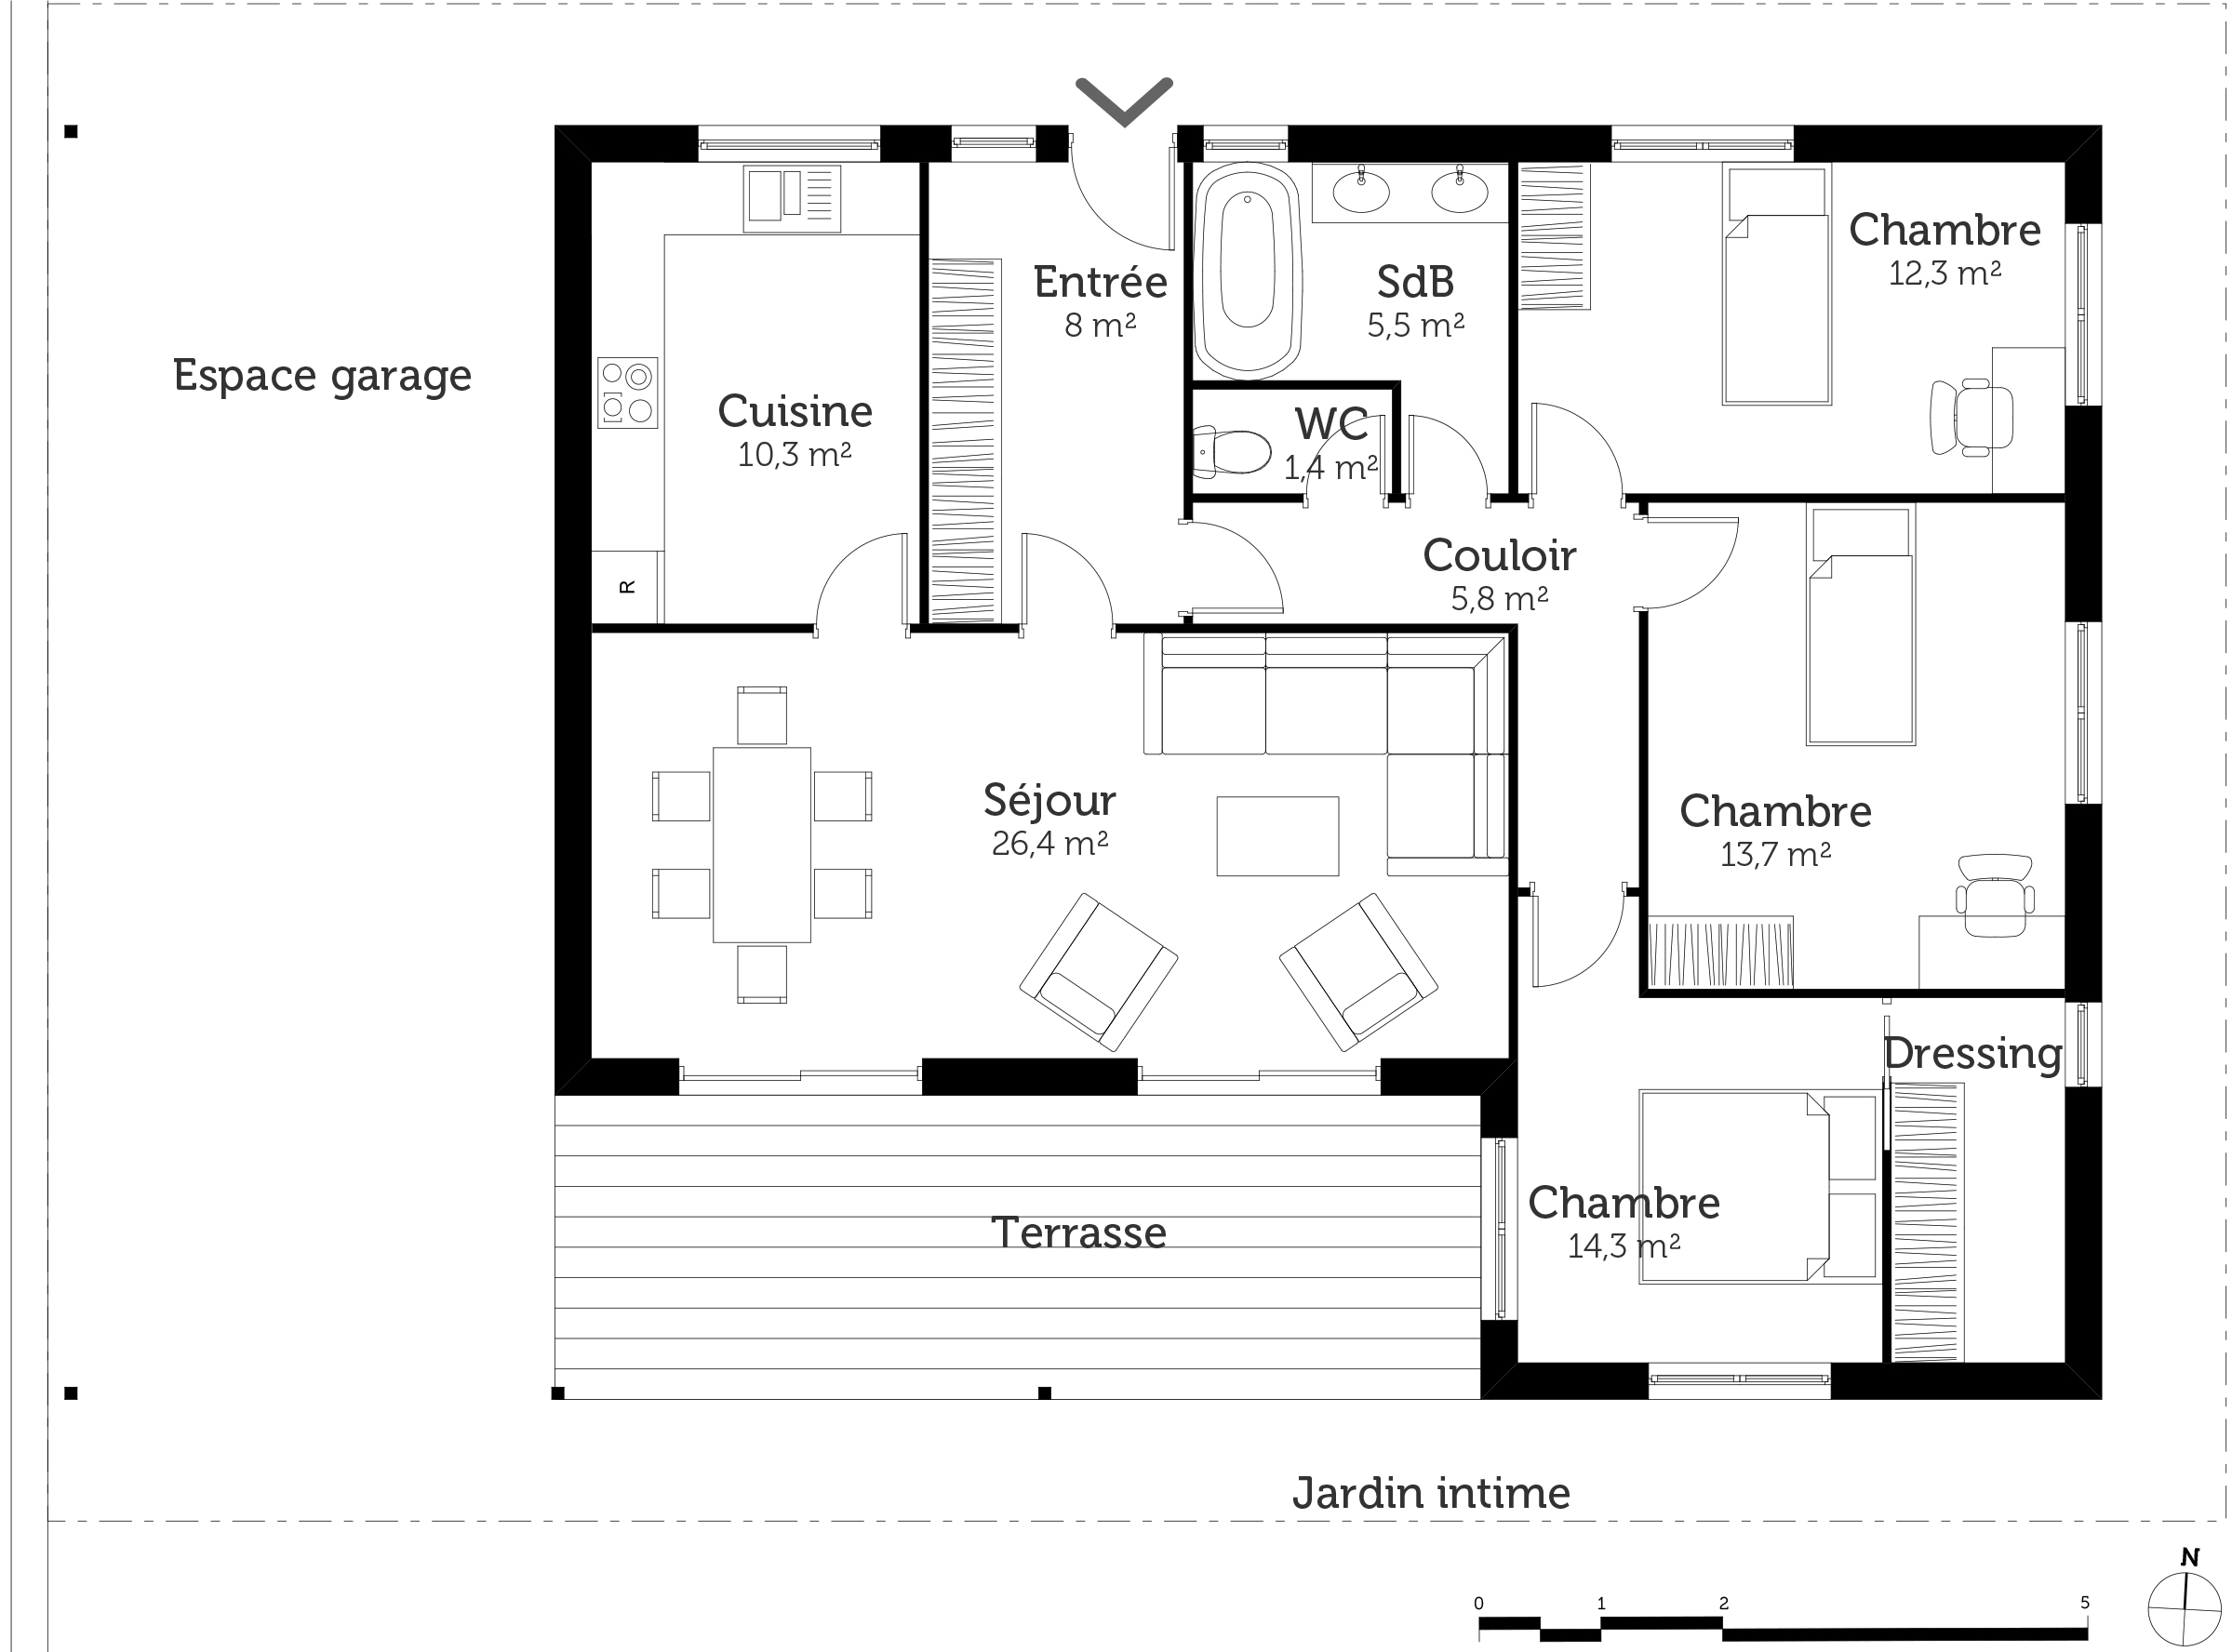

In [15]:
prompt = "How many rooms? How many bedrooms? How many doors and windows?"

image_path = "plan.jpg"

img = Image.open(image_path)
img

In [16]:
res = gpt41_imagefile(prompt, image_path)
print(res)

Let's analyze the floor plan:

**How many rooms?**
- Entrée (Entrance)
- Cuisine (Kitchen)
- Séjour (Living/Dining Room)
- SdB (Bathroom)
- WC (Toilet)
- Couloir (Hallway)
- Chambre (Bedroom) 1
- Chambre (Bedroom) 2
- Chambre (Bedroom) 3
- Dressing (Walk-in Closet)

**Total rooms:** 10 (if you count all labeled spaces, including the hallway and dressing)

**How many bedrooms?**
- Chambre 1 (12.3 m²)
- Chambre 2 (13.7 m²)
- Chambre 3 (14.3 m²)

**Total bedrooms:** 3

**How many doors?**
- Entrance door: 1
- Kitchen to Séjour: 1
- Entrée to Séjour: 1
- Entrée to Couloir: 1
- Couloir to Bathroom (SdB): 1
- Couloir to WC: 1
- Couloir to Bedroom 1: 1
- Couloir to Bedroom 2: 1
- Bedroom 2 to Dressing: 1
- Séjour to Terrace: 1 (large glass door)
- Each bedroom to outside: 1 each (3 total, as each has a door to the outside)

**Total doors:** 13

**How many windows?**
- Kitchen: 1
- Bathroom (SdB): 1
- Bedroom 1: 1
- Bedroom 2: 1
- Bedroom 3: 1
- Séjour: 2 (one large, one small)
- Dressing: 1



In [17]:
prompt = "What is the total surface? Print all the surfaces by descending order of surface"

image_path = "plan.jpg"

In [18]:
res = gpt41_imagefile(prompt, image_path)
print(res)

Let's list all the surfaces (in m²) in descending order, as shown on the floor plan:

1. Séjour (Living Room): 26.4 m²
2. Chambre (Bedroom): 14.3 m²
3. Chambre (Bedroom): 13.7 m²
4. Chambre (Bedroom): 12.3 m²
5. Cuisine (Kitchen): 10.3 m²
6. Entrée (Entrance): 8 m²
7. Couloir (Corridor): 5.8 m²
8. SdB (Bathroom): 5.5 m²
9. WC: 1.4 m²

Now, let's sum them up for the total surface:

26.4 + 14.3 + 13.7 + 12.3 + 10.3 + 8 + 5.8 + 5.5 + 1.4 = **97.7 m²**

**Summary (by descending order):**
1. Séjour: 26.4 m²
2. Chambre: 14.3 m²
3. Chambre: 13.7 m²
4. Chambre: 12.3 m²
5. Cuisine: 10.3 m²
6. Entrée: 8 m²
7. Couloir: 5.8 m²
8. SdB: 5.5 m²
9. WC: 1.4 m²

**Total surface: 97.7 m²**


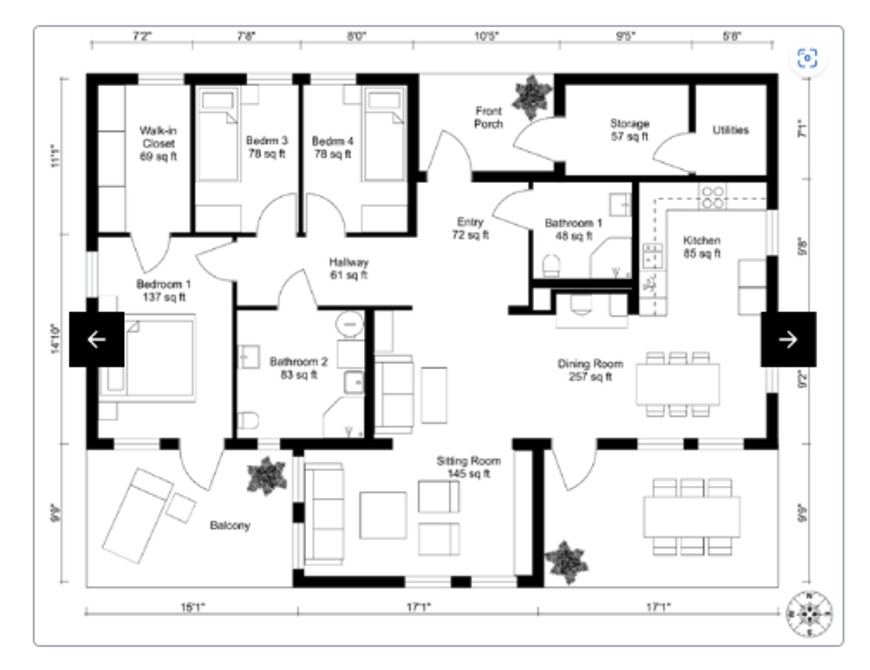

In [19]:
image_path = "image1.jpg"

img = Image.open(image_path)
img

In [20]:
prompt = """
Here is a building floor plan.
Imagine the top left corner of the image is coordinate (0,0).
Can you give me the coordinates (in pixels) for the 8 exteriors corners of this facility?
Please note: the Thick Black lines Represent exterior walls. So the corners of those walls are what we are looking for. (not thin interior walls, or balcony spaces etc ... ).

Display the results in a df format.
"""

In [21]:
res = gpt41_imagefile(prompt, image_path)
print(res)

Certainly! I will estimate the pixel coordinates for the 8 exterior corners of the facility, using the thick black lines as the exterior wall boundaries. The origin (0,0) is at the top left corner of the image.

Here are the coordinates for the 8 exterior corners, listed clockwise starting from the top-left:

| Corner | X (px) | Y (px) |
|--------|--------|--------|
| 1      |   52   |   52   |
| 2      |  710   |   52   |
| 3      |  710   |  180   |
| 4      |  635   |  180   |
| 5      |  635   |  670   |
| 6      |  370   |  670   |
| 7      |  370   |  430   |
| 8      |   52   |  430   |

**Notes:**
- The coordinates are approximate, based on visual estimation of the image.
- The corners are numbered clockwise, starting from the top-left exterior corner.
- Only the thick black lines (exterior walls) are considered.

If you need the coordinates in a different order or more precision, let me know!


In [22]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Do we have any differences between these two images?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
                    },
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)

print(response.choices[0].message.content)

I see that you have uploaded two images, but after careful comparison, **both images appear to be identical**. There are no visible differences between them in terms of elements, colors, or objects.

If you have a more specific aspect you'd like me to focus on, please let me know!


## Comparing two images

In [23]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Do we have any differences between these two images?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://eu.cdn.autosonshow.tv/993/autocaptureautoimage/CN67ZWL/PEUGEOT__3008__PURETECH_S-S_GT_LINE__PETROL__RED__2017__CN67ZWL-e01_md.jpg?t=1547520080",
                    },
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://1.bp.blogspot.com/-eMnLn3QK0YM/X0lE-OKjgPI/AAAAAAAA_Io/JSYyB4PpEeEHpvieCE0aS2wkgi3KV_PVACNcBGAsYHQ/s600/burlappcar-peugeot-3008-1.jpg",
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)

print(response.choices[0].message.content)

Yes, there are several differences between these two images:

1. **Color**:  
   - The first car is **red**.
   - The second car is **orange/copper**.

2. **Background**:  
   - The first image has a natural background (grass, forest/trees).
   - The second image has a plain white studio background.

3. **Number Plate**:  
   - The first car has a UK number plate: "CN67 ZWL".
   - The second car has a simple "3008" plate (model number).

4. **Angle/Orientation**:  
   - The first car is shown more from the front-left.
   - The second car is shown primarily from the left side/front-left.

5. **Reflections and Lighting**:  
   - The first car has outdoor reflections and lighting.
   - The second car has studio lighting and fewer reflections.

**Summary**: Both are images of the Peugeot 3008, but the color, background, license plate, and camera angles are different.
